## 1. Load the titanic dataset in the individual job from Tensorflow Datasets, including the independent features (age, fare) and class label (embarked) specified in the job. Leave in the set features that take numeric values.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
# loading titanic dataset
ds = tfds.load("titanic", split='train')
print(ds)

<_PrefetchDataset element_spec={'age': TensorSpec(shape=(), dtype=tf.float32, name=None), 'boat': TensorSpec(shape=(), dtype=tf.string, name=None), 'body': TensorSpec(shape=(), dtype=tf.int32, name=None), 'cabin': TensorSpec(shape=(), dtype=tf.string, name=None), 'embarked': TensorSpec(shape=(), dtype=tf.int64, name=None), 'fare': TensorSpec(shape=(), dtype=tf.float32, name=None), 'home.dest': TensorSpec(shape=(), dtype=tf.string, name=None), 'name': TensorSpec(shape=(), dtype=tf.string, name=None), 'parch': TensorSpec(shape=(), dtype=tf.int32, name=None), 'pclass': TensorSpec(shape=(), dtype=tf.int64, name=None), 'sex': TensorSpec(shape=(), dtype=tf.int64, name=None), 'sibsp': TensorSpec(shape=(), dtype=tf.int32, name=None), 'survived': TensorSpec(shape=(), dtype=tf.int64, name=None), 'ticket': TensorSpec(shape=(), dtype=tf.string, name=None)}>


In [3]:
# Convert tf.data.titanic to a panda dataframe
df = tfds.as_dataframe(ds)
df.head()

,age,boat,body,cabin,embarked,fare,home.dest,name,parch,pclass,sex,sibsp,survived,ticket
0,30.0,b'Unknown',-1,b'Unknown',2,13.0000,"b'Sarnia, ON'","b'McCrie, Mr. James Matthew'",0,1,0,0,0,b'233478'
1,37.0,b'Unknown',98,b'Unknown',2,7.9250,"b'Ruotsinphytaa, Finland New York, NY'","b'Gustafsson, Mr. Anders Vilhelm'",0,2,0,2,0,b'3101276'
2,28.0,b'9',-1,b'Unknown',2,13.0000,b'Spain',"b'Reynaldo, Ms. Encarnacion'",0,1,1,0,1,b'230434'
3,18.0,b'Unknown',-1,b'Unknown',2,73.5000,"b'Lyndhurst, England'","b'Davies, Mr. Charles Henry'",0,1,0,0,0,b'S.O.C. 14879'
4,-1.0,b'Unknown',-1,b'Unknown',0,7.8958,b'Unknown',"b'Gheorgheff, Mr. Stanio'",0,2,0,0,0,b'349254'


In [4]:
#Let's drop columns which don't take numeric values
df = df.drop(columns=['boat', 'cabin', 'home.dest', 'name', 'ticket'])
df.head()

,age,body,embarked,fare,parch,pclass,sex,sibsp,survived
0,30.0,-1,2,13.0000,0,1,0,0,0
1,37.0,98,2,7.9250,0,2,0,2,0
2,28.0,-1,2,13.0000,0,1,1,0,1
3,18.0,-1,2,73.5000,0,1,0,0,0
4,-1.0,-1,0,7.8958,0,2,0,0,0


In [5]:
#Let's see which columns have NaN values
# count NaN values in each column
print(df.isnull().sum())

age         0
body        0
embarked    0
fare        0
parch       0
pclass      0
sex         0
sibsp       0
survived    0
dtype: int64


## 2. Visualize points in a dataset on a plane with coordinates corresponding to two independent features, displaying points of different classes in different colors. Label the axes and figure, and create a legend for the dataset classes.

In [6]:
# Port of Embarkation is unknown
df = df[df['embarked'] != 3] 

In [7]:
# age is -1
df['age'].value_counts()

age
-1.0000     263
 24.0000     47
 22.0000     43
 21.0000     41
 30.0000     40
           ... 
 24.5000      1
 80.0000      1
 0.3333       1
 23.5000      1
 55.5000      1
Name: count, Length: 99, dtype: int64

In [8]:
#263 age entries are missing we need to impute correctly
#Replace -1 with NaN
df['age'].replace(-1, np.nan, inplace=True)

# Fill missing age values with the mean age grouped by 'pclass' and 'sex'
df['age'].fillna(df.groupby(['pclass', 'sex'])['age'].transform('mean'), inplace=True)

C:\Users\Mo\AppData\Local\Temp\ipykernel_23540\746953612.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].replace(-1, np.nan, inplace=True)
C:\Users\Mo\AppData\Local\Temp\ipykernel_23540\746953612.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when do

In [9]:
# age is -1
df['age'].value_counts()

age
25.962273    144
22.185308     64
24.000000     47
22.000000     43
21.000000     41
            ... 
80.000000      1
0.666700       1
74.000000      1
26.500000      1
55.500000      1
Name: count, Length: 104, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1307 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1307 non-null   float32
 1   body      1307 non-null   int32  
 2   embarked  1307 non-null   int64  
 3   fare      1307 non-null   float32
 4   parch     1307 non-null   int32  
 5   pclass    1307 non-null   int64  
 6   sex       1307 non-null   int64  
 7   sibsp     1307 non-null   int32  
 8   survived  1307 non-null   int64  
dtypes: float32(2), int32(3), int64(4)
memory usage: 76.6 KB


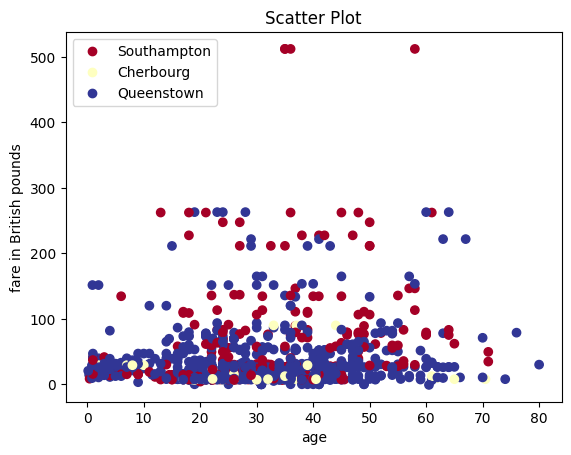

In [11]:
embarked_labels = {
    0: 'Southampton',
    1: 'Cherbourg',
    2: 'Queenstown',
    3: 'Unknown'
}
plt.xlabel('age')  # Возраст
plt.ylabel('fare in British pounds')  # плата за проезд
plt.title('Scatter Plot')
scatter = plt.scatter(df['age'], df['fare'], c = df['embarked'], cmap = plt.cm.RdYlBu, label=[embarked_labels[i] for i in df['embarked']])
plt.legend(handles=scatter.legend_elements()[0], labels=[embarked_labels[i] for i in range(4)], loc='upper left')
plt.show()

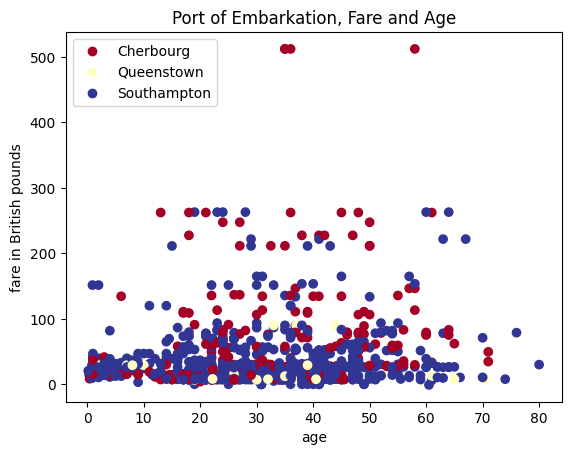

In [12]:
embarked_labels = {
    0: 'Cherbourg',
    1: 'Queenstown',
    2: 'Southampton',
    3: 'Unknown'
}
plt.xlabel('age')  # Возраст
plt.ylabel('fare in British pounds')  # плата за проезд
plt.title('Port of Embarkation, Fare and Age')
scatter = plt.scatter(df['age'], df['fare'], c = df['embarked'], cmap = plt.cm.RdYlBu, label=[embarked_labels[i] for i in df['embarked']])
plt.legend(handles=scatter.legend_elements()[0], labels=[embarked_labels[i] for i in range(4)], loc='upper left')
plt.show()

## 3. If a feature with class labels contains more than two classes, then combine some of the classes to obtain a set for binary classification. Combine classes so that the positive and negative classes are comparable in number of points.¶

In [13]:
 df['embarked'].value_counts()

embarked
2    914
0    270
1    123
Name: count, dtype: int64

In [14]:
# Combine classes 0 (Cherbourg) and 1 (Queenstown) into one class
df.loc[df['embarked'].isin([0, 1]), 'embarked'] = 0

In [15]:
# Let's rename class 2 into class 1
# Replace class 2 with 1
df['embarked'] = df['embarked'].replace(2, 1)

In [16]:
 df['embarked'].value_counts()

embarked
1    914
0    393
Name: count, dtype: int64

## 4. Split the data set of two features and binary class labels into training and test sets. Build neural networks with a normalizing layer and the parameters specified in the individual task for binary classification and train them on the training set, controlling the learning process of the neural networks. Determine the neural network with higher binary classification quality based on the binary classification score specified in the individual assignment.

## 5. Visualize the decision boundaries of the constructed neural networks in separate figures on the entire data set of two features and binary class labels.

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = np.array(df.drop('embarked', axis=1))
y = np.array(df['embarked'])

In [19]:
X.shape, y.shape

((1307, 8), (1307,))

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((914, 8), (393, 8), (914,), (393,))

Deep neural network for binary classification problem
Since the features of the set have different ranges of change, we use a normalization layer adapted to all independent features:

In [32]:
# embarked class has 3 classes
def to_one_hot(labels, dimension=3):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [33]:
y_train.shape, y_test.shape

((914,), (393,))

In [34]:
# Normalizlation layer:
feature_normalizer = tf.keras.layers.Normalization(axis=None, input_shape=(X_train.shape[1],))
feature_normalizer.adapt(X_train)

Let's create a neural network with three hidden dense layers with 128 neurons with elu, sigmoid, tanh activation functions, and an output layer of one neuron with a sigmoid activation function:

In [35]:
model = tf.keras.Sequential([
    feature_normalizer,
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization)      │ (None, 8)                   │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,308 (134.02 KB)

 Trainable params: 34,305 (134.00 KB)

 Non-trainable params: 3 (16.00 B)

Используем в качестве функции потерь при работе с задачами бинарной классификации `binary_crossentropy`. В ходе обучения будем отслеживать показатель доля верных ответов (accuracy):

In [36]:
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.AdamW(learning_rate=0.01),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

In [37]:
history = model.fit(X_train, y_train, epochs=3)

Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 714us/step - accuracy: 0.6369 - loss: 0.9741 
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - accuracy: 0.7036 - loss: 0.6035
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - accuracy: 0.7115 - loss: 0.6042


Best model is 3

### Visualization of model training

In [38]:
from matplotlib import rcParams

rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

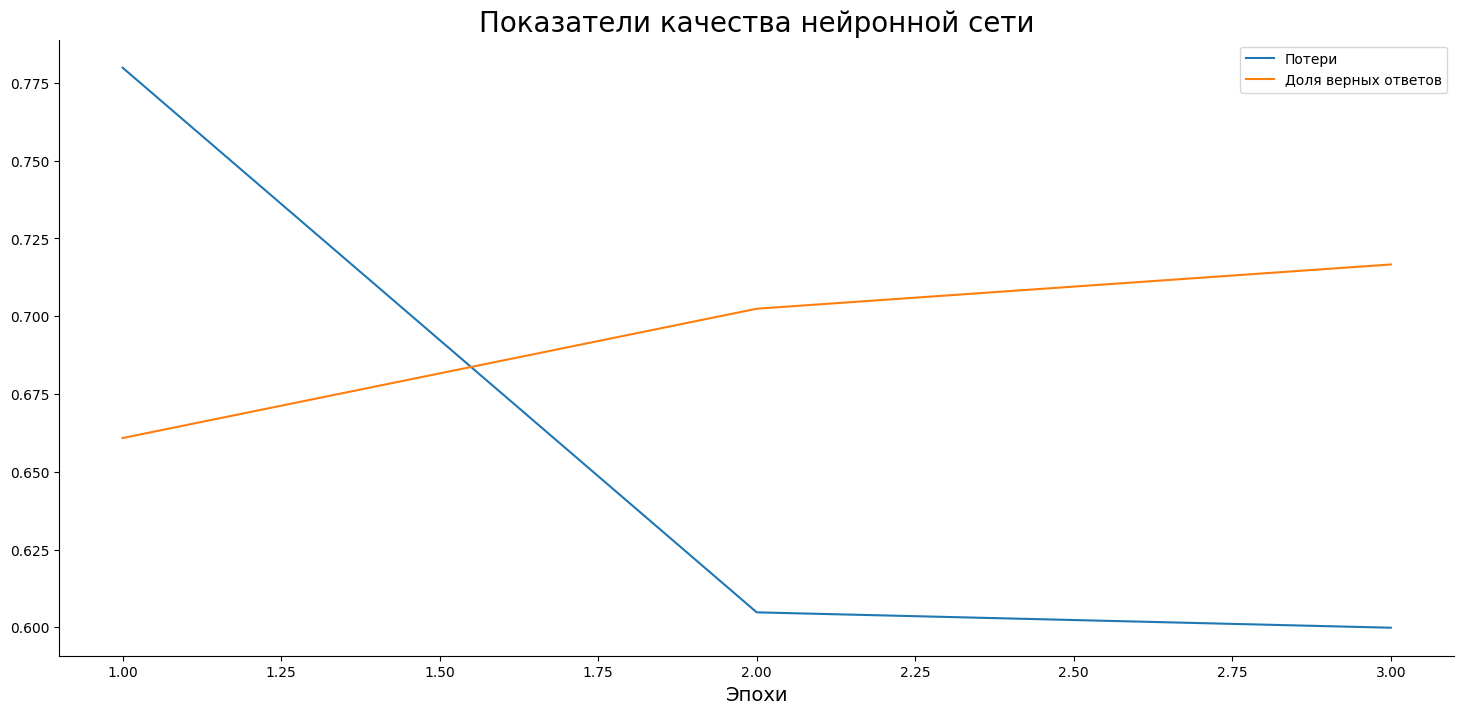

In [39]:
plt.plot(np.arange(1, 4), history.history['loss'], label='Потери')
plt.plot(np.arange(1, 4), history.history['accuracy'], label='Доля верных ответов')
plt.title('Показатели качества нейронной сети', size=20)
plt.xlabel('Эпохи', size=14)
plt.legend();

### Model prediction

Using a trained neural network, we obtain output values that can be interpreted as probabilities:

In [40]:
prediction = model.predict(X_test)
prediction

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([[0.7066155 ],
       [0.772095  ],
       [0.4541345 ],
       [0.770661  ],
       [0.7724402 ],
       [0.76834667],
       [0.7777947 ],
       [0.7704193 ],
       [0.7767929 ],
       [0.7725379 ],
       [0.7724498 ],
       [0.7736374 ],
       [0.77157843],
       [0.59562296],
       [0.7728024 ],
       [0.769276  ],
       [0.7732239 ],
       [0.7769171 ],
       [0.6877238 ],
       [0.5933858 ],
       [0.75281227],
       [0.7683605 ],
       [0.7729827 ],
       [0.76465464],
       [0.76953983],
       [0.7726105 ],
       [0.44369072],
       [0.7697357 ],
       [0.71581244],
       [0.77244854],
       [0.62622225],
       [0.76902634],
       [0.77800584],
       [0.59014994],
       [0.6877238 ],
       [0.7691015 ],
       [0.7707733 ],
       [0.7765838 ],
       [0.44850484],
       [0.7688331 ],
       [0.56484234],
       [0.44939807],
       [0.7758101 ],
       [0.7689531 ],
       [0.4396426 ],
       [0.7700578 ],
       [0.76727957],
       [0.774

These probabilities can be converted into predicted classes as follows (a threshold of 0.5 was used):

In [41]:
y_pred = np.array([1 if prob > 0.5 else 0 for prob in np.ravel(prediction)])
print(y_pred)

[1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1]


The model evaluation on the test sample looks like this:

In [42]:
loss, accuracy = model.evaluate(X_test, y_test)
loss, accuracy

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - accuracy: 0.6875 - loss: 0.6200


(0.6088259220123291, 0.6921119689941406)

### Visualization of the decision boundary

The decision boundary for the constructed classifier:

In [43]:
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    # уровень выводимой информации
                    verbose=1,
                    # проверка (валидация) на 20% обучающих данных
                    validation_split = 0.2)

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7338 - loss: 0.5855 - val_accuracy: 0.7432 - val_loss: 0.6185
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7093 - loss: 0.6203 - val_accuracy: 0.7104 - val_loss: 0.6377
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6976 - loss: 0.6452 - val_accuracy: 0.7104 - val_loss: 0.5944
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6906 - loss: 0.6093 - val_accuracy: 0.6995 - val_loss: 0.6011
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7193 - loss: 0.5887 - val_accuracy: 0.7268 - val_loss: 0.5953
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7215 - loss: 0.5963 - val_accuracy: 0.7213 - val_loss: 0.5773
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7392 - loss: 0.5715 - val_accuracy: 0.7213 - val_loss: 0.5988
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7376 - loss: 0.5850 - val_accuracy: 0.7158 - val_loss:

In [50]:
def plot_decision_boundary(model, X, y):
    # Найдем диапазоны изменения по осям и построим сетку
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    # Набор данных для прогнозирования
    X_in = np.c_[xx.ravel(), yy.ravel()]
    # Прогноз при помощи обученной модели
    y_pred = model.predict(X_in)
    # Проверка мультиклассовости
    if len(y_pred[1]) > 1:
        # мультиклассовая классификация
        # изменяем форму прогноза для визуализации
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        # бинарная классификация
        y_pred = np.round(y_pred).reshape(xx.shape)
    # Рисуем границу решения
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

InvalidArgumentError: Graph execution error:

Detected at node sequential_1_1/dense_4_1/Elu defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\Mo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "C:\Users\Mo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "C:\Users\Mo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "C:\Users\Mo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\asyncio\base_events.py", line 608, in run_forever

  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\asyncio\base_events.py", line 1936, in _run_once

  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\asyncio\events.py", line 84, in _run

  File "C:\Users\Mo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue

  File "C:\Users\Mo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel\kernelbase.py", line 534, in process_one

  File "C:\Users\Mo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "C:\Users\Mo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel\ipkernel.py", line 362, in execute_request

  File "C:\Users\Mo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel\kernelbase.py", line 778, in execute_request

  File "C:\Users\Mo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel\ipkernel.py", line 449, in do_execute

  File "C:\Users\Mo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\Mo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell

  File "C:\Users\Mo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell

  File "C:\Users\Mo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\Mo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async

  File "C:\Users\Mo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes

  File "C:\Users\Mo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code

  File "C:\Users\Mo\AppData\Local\Temp\ipykernel_23540\539169838.py", line 4, in <module>

  File "C:\Users\Mo\AppData\Local\Temp\ipykernel_23540\2398334850.py", line 10, in plot_decision_boundary

  File "C:\Users\Mo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\Mo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\backend\tensorflow\trainer.py", line 519, in predict

  File "C:\Users\Mo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\backend\tensorflow\trainer.py", line 217, in one_step_on_data_distributed

  File "C:\Users\Mo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\backend\tensorflow\trainer.py", line 206, in one_step_on_data

  File "C:\Users\Mo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\backend\tensorflow\trainer.py", line 98, in predict_step

  File "C:\Users\Mo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\Mo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\layer.py", line 826, in __call__

  File "C:\Users\Mo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\Mo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\ops\operation.py", line 48, in __call__

  File "C:\Users\Mo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "C:\Users\Mo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\models\sequential.py", line 206, in call

  File "C:\Users\Mo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\models\functional.py", line 199, in call

  File "C:\Users\Mo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\ops\function.py", line 151, in _run_through_graph

  File "C:\Users\Mo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\models\functional.py", line 583, in call

  File "C:\Users\Mo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\Mo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\layer.py", line 826, in __call__

  File "C:\Users\Mo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\Mo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\ops\operation.py", line 48, in __call__

  File "C:\Users\Mo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "C:\Users\Mo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py", line 147, in call

  File "C:\Users\Mo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\activations\activations.py", line 193, in elu

  File "C:\Users\Mo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\ops\nn.py", line 419, in elu

  File "C:\Users\Mo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\backend\tensorflow\nn.py", line 65, in elu

Matrix size-incompatible: In[0]: [32,2], In[1]: [8,128]
	 [[{{node sequential_1_1/dense_4_1/Elu}}]] [Op:__inference_one_step_on_data_distributed_23760]

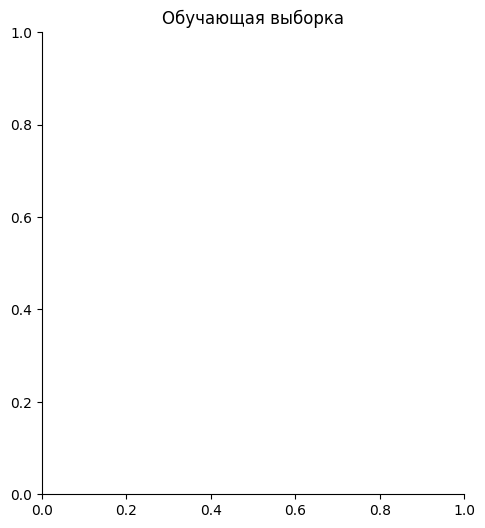

In [51]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Обучающая выборка")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Тестовая выборка")
plot_decision_boundary(model, X_test, y_test)

### Quality indicators for binary classification

When there are only two classes, we will call class $c_{1}$ the positive class and class $c_{2}$ the negative class. Then the confusion matrix takes the form:

$$\left(\begin{array}{cc}
TP&FN\\
FP&TN
\end{array}\right),$$

Where
* $TP$ – (True Positives) – number of correctly predicted points in class $c_{1}$
* $FN$ – (False Negatives) – number of points in class $c_{1}$, incorrectly predicted into class $c_{2}$
* $FP$ – (False Positives) – number of points in class $c_{2}$, incorrectly predicted to class $c_{1}$
* $TN$ – (True Negatives) – number of correctly predicted points in class $c_{2}$

In [52]:
def TN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 0))

In [53]:
def FP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 1))

In [54]:
def FN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 0))

In [55]:
def TP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 1))

The confusion matrix for binary classification is defined as follows:

In [56]:
def confusion_matrix(y_true, y_predict):
    return np.array([
        [TP(y_true, y_predict), FN(y_true, y_predict)],
        [FP(y_true, y_predict), TN(y_true, y_predict)]
    ])

In [57]:
confusion_matrix(y_test, y_pred)

array([[257,  10],
       [111,  15]])

In [58]:
def tpr_score(y_true, y_predict):
    tp = TP(y_true, y_predict)
    fn = FN(y_true, y_predict)
    try:
        return tp / (tp + fn)
    except:
        return 0.0

def fpr_score(y_true, y_predict):
    fp = FP(y_true, y_predict)
    tn = TN(y_true, y_predict)
    try:
        return fp / (fp + tn)
    except:
        return 0.0

In [59]:
tpr_score(y_test, y_pred), fpr_score(y_test, y_pred)

(0.9625468164794008, 0.8809523809523809)

𝐹𝑁 (False Negatives) – the number of points in the positive class that were incorrectly predicted into the negative class

In [60]:
FN(y_test, y_pred)

10

#

## 6. Visualize ROC curves for the constructed classifiers based on neural networks in one figure, calculate the areas under the ROC curves using the trapezoidal method or another method, and create a legend indicating the areas of the curves.

### ROC analysis

ROC (Receiver Operating Characteristic) analysis is a popular strategy for evaluating the performance of binary classifiers. For ROC analysis, you need not only a prediction of class labels, but also the values of the so-called. scoring function for each point in the test set. As the values of the scoring function, we can take the probabilities returned by the neural network:

In [61]:
df.head()

,age,body,embarked,fare,parch,pclass,sex,sibsp,survived
0,30.000000,-1,1,13.0000,0,1,0,0,0
1,37.000000,98,1,7.9250,0,2,0,2,0
2,28.000000,-1,1,13.0000,0,1,1,0,1
3,18.000000,-1,1,73.5000,0,1,0,0,0
4,25.962273,-1,0,7.8958,0,2,0,0,0


In [62]:
X = np.array(df.drop('embarked', axis=1))
y = np.array(df['embarked'])

In [63]:
def true_false_positive(threshold_vector, y_test):
    true_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 1)
    true_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 0)
    false_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 0)
    false_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 1)

    tpr = true_positive.sum() / (true_positive.sum() + false_negative.sum())
    fpr = false_positive.sum() / (false_positive.sum() + true_negative.sum())

    return tpr, fpr

In [64]:
def roc_from_scratch(probabilities, y_test, partitions=100):
    roc = np.array([])
    for i in range(partitions + 1):

        threshold_vector = np.greater_equal(probabilities, i / partitions).astype(int)
        tpr, fpr = true_false_positive(threshold_vector, y_test)
        roc = np.append(roc, [fpr, tpr])

    return roc.reshape(-1, 2)

In [66]:
prediction = model.predict(X)
prediction.shape

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step


(1307, 1)

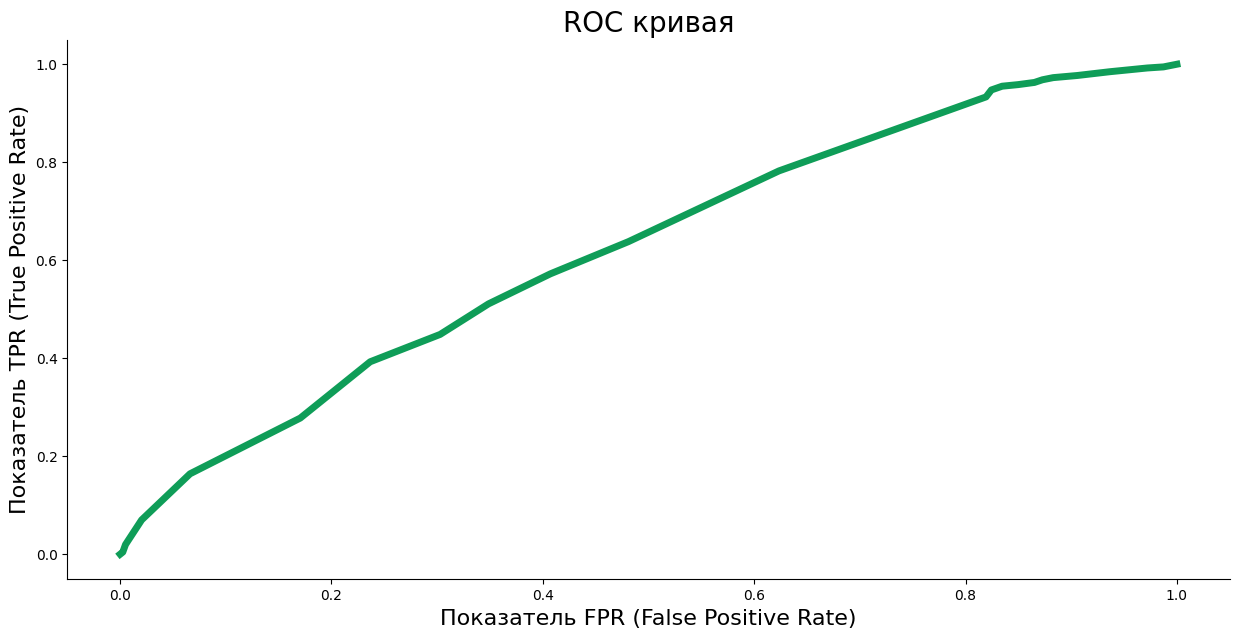

In [67]:
plt.figure(figsize=(15,7))

ROC = roc_from_scratch(prediction.reshape(-1),y,partitions=50)
#plt.scatter(ROC[:,0],ROC[:,1],color='#0F9D58',s=100)
plt.plot(ROC[:,0],ROC[:,1],color='#0F9D58',lw=5)
plt.title('ROC кривая',fontsize=20)
plt.xlabel('Показатель FPR (False Positive Rate)',fontsize=16)
plt.ylabel('Показатель TPR (True Positive Rate)',fontsize=16);

In [68]:
def auc_trapezoidal(roc_curve):
    # Sort ROC curve by increasing FPR
    sorted_roc_curve = roc_curve[np.argsort(roc_curve[:, 0])]

    # Initialize area under the curve
    auc = 0.0

    # Iterate through sorted ROC curve points
    for i in range(1, len(sorted_roc_curve)):
        # Calculate trapezoidal area between consecutive points
        prev_fpr, prev_tpr = sorted_roc_curve[i - 1]
        curr_fpr, curr_tpr = sorted_roc_curve[i]
        auc += (curr_fpr - prev_fpr) * (curr_tpr + prev_tpr) / 2.0

    return auc

In [69]:
# Calculate AUC and it is very low
auc = auc_trapezoidal(ROC)
auc

0.6230449719099559

## 7. Define an additional feature in the original data set, different from the two independent features specified in the task, taking continuous values and having maximum variance.

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1307 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1307 non-null   float32
 1   body      1307 non-null   int32  
 2   embarked  1307 non-null   int64  
 3   fare      1307 non-null   float32
 4   parch     1307 non-null   int32  
 5   pclass    1307 non-null   int64  
 6   sex       1307 non-null   int64  
 7   sibsp     1307 non-null   int32  
 8   survived  1307 non-null   int64  
dtypes: float32(2), int32(3), int64(4)
memory usage: 76.6 KB


In [71]:
# Drop independant features
features = df.drop(["age", "fare"], axis=1)

# calcualte var
variances = features.var()

# find max var
max_variance_feature = variances.idxmax()

print("Признак с максимальной дисперсией (не считая 'age' и 'fare'): ", max_variance_feature)

Признак с максимальной дисперсией (не считая 'age' и 'fare'):  body


## 8. Visualize data points in 3D space with coordinates corresponding to three independent features, displaying points of different classes in different colors. Label the axes and figure, and create a legend for the dataset classes.

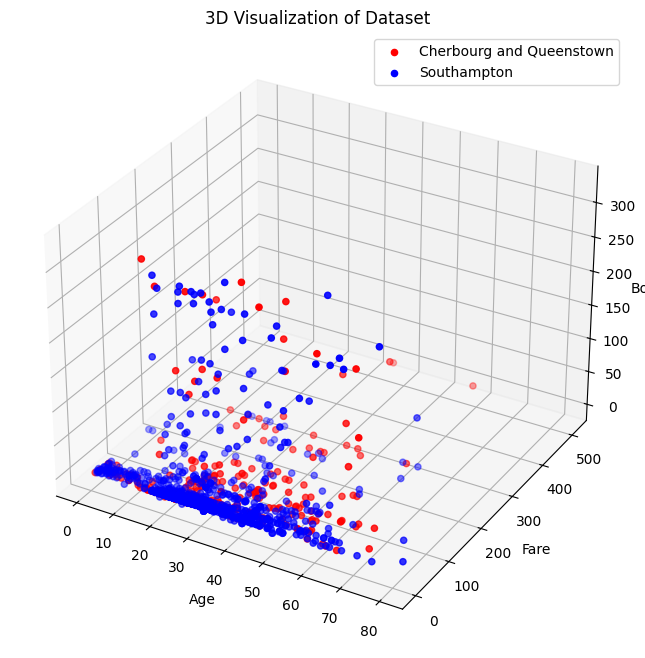

In [72]:
from mpl_toolkits.mplot3d import Axes3D

# Create 3d graph
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111, projection='3d')

# Divide into two classes 
class_0 = df[df['embarked'] == 0] ## Cherbourg and Queenstown
class_1 = df[df['embarked'] == 1] ## Southampton

# Points of each class
ax.scatter(class_0['age'], class_0['fare'], class_0['body'], c='r', label='Cherbourg and Queenstown')
ax.scatter(class_1['age'], class_1['fare'], class_1['body'], c='b', label='Southampton')

# naming axis
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.set_zlabel('Body')
plt.title('3D Visualization of Dataset')
plt.legend()
plt.show()

## 9. Split the original data set into training and test sets. Build a neural network for multi-class classification with a normalizing layer and parameters corresponding to the best neural network for binary classification from step 4, and train it on the training set, controlling the process of its training.

In [73]:
X = np.array(df.drop('embarked', axis=1))
y = np.array(df['embarked'])

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [75]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((914, 8), (393, 8), (914,), (393,))

In [76]:
feature_normalizer = tf.keras.layers.Normalization(axis=None,input_shape=(X.shape[1],))
feature_normalizer.adapt(X)

C:\Users\Mo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\preprocessing\normalization.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [77]:
model = tf.keras.Sequential([
    feature_normalizer,
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_2 (Normalization)      │ (None, 8)                   │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,308 (134.02 KB)

 Trainable params: 34,305 (134.00 KB)

 Non-trainable params: 3 (16.00 B)

In [78]:
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.AdamW(learning_rate=0.01),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

In [79]:
history = model.fit(X_train, y_train, epochs=3)

Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 643us/step - accuracy: 0.6275 - loss: 1.0874 
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - accuracy: 0.7202 - loss: 0.6019
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - accuracy: 0.6897 - loss: 0.6251


In [80]:
from matplotlib import rcParams

rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

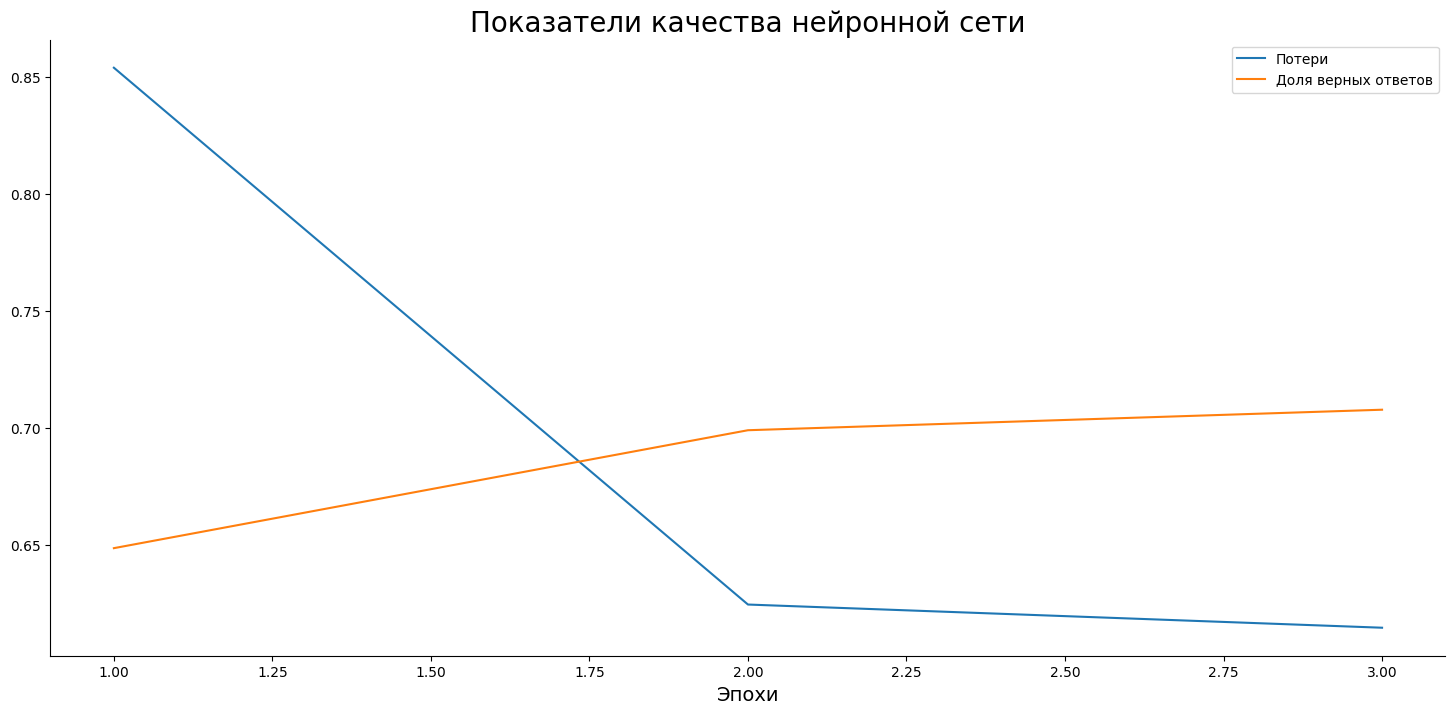

In [81]:
plt.plot(np.arange(1, 4), history.history['loss'], label='Потери')
plt.plot(np.arange(1, 4), history.history['accuracy'], label='Доля верных ответов')
plt.title('Показатели качества нейронной сети', size=20)
plt.xlabel('Эпохи', size=14)
plt.legend();

### Прогнозирование при помощи модели

При помощи обученной нейронной сети получаем на выходе значения, которые можно интерпретировать как вероятности:


In [82]:
prediction = model.predict(X_test)
prediction

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[0.6123246 ],
       [0.64298224],
       [0.5243254 ],
       [0.64303803],
       [0.6416782 ],
       [0.63898754],
       [0.62482834],
       [0.64237785],
       [0.6442581 ],
       [0.64071256],
       [0.64318836],
       [0.64230275],
       [0.63890034],
       [0.5811925 ],
       [0.6437304 ],
       [0.64162093],
       [0.64231306],
       [0.5979695 ],
       [0.60852826],
       [0.58032286],
       [0.6275865 ],
       [0.6412301 ],
       [0.6434821 ],
       [0.6364685 ],
       [0.64242566],
       [0.6427953 ],
       [0.5190929 ],
       [0.6420332 ],
       [0.6153544 ],
       [0.64363784],
       [0.5875317 ],
       [0.64175344],
       [0.59212464],
       [0.57898384],
       [0.60852826],
       [0.6411085 ],
       [0.64264643],
       [0.5900341 ],
       [0.52193666],
       [0.6420702 ],
       [0.6301411 ],
       [0.5225542 ],
       [0.6434603 ],
       [0.6416855 ],
       [0.5186697 ],
       [0.6419815 ],
       [0.6404468 ],
       [0.643

Эти вероятности можно преобразовать в прогнозируемые классы следующим образом (использовано пороговое значение 0.5):

In [83]:
y_pred = np.array([1 if prob > 0.5 else 0 for prob in np.ravel(prediction)])
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Оценка модели на тестовой выборке выглядит так:

In [101]:
loss, accuracy = model.evaluate(X_test, y_test)
loss, accuracy

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - accuracy: 0.6596 - loss: 0.6349


(0.6223652362823486, 0.6793892979621887)

In [112]:
confusion_matrix(y_test, y_pred)

array([[267,   0],
       [126,   0]])

In [113]:
tpr_score(y_test, y_pred), fpr_score(y_test, y_pred)

(1.0, 1.0)

In [114]:
prediction = model.predict(X)
prediction.shape

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step


(1307, 1)

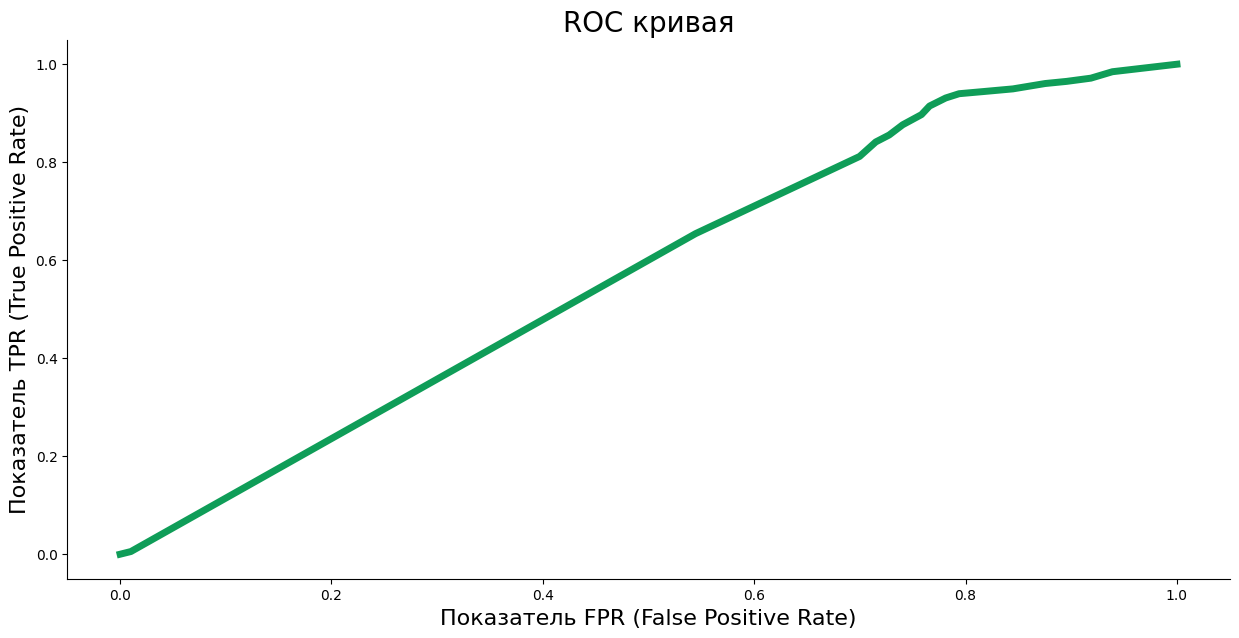

In [115]:
plt.figure(figsize=(15,7))

ROC = roc_from_scratch(prediction.reshape(-1),y,partitions=50)
#plt.scatter(ROC[:,0],ROC[:,1],color='#0F9D58',s=100)
plt.plot(ROC[:,0],ROC[:,1],color='#0F9D58',lw=5)
plt.title('ROC кривая',fontsize=20)
plt.xlabel('Показатель FPR (False Positive Rate)',fontsize=16)
plt.ylabel('Показатель TPR (True Positive Rate)',fontsize=16);

In [116]:
# Calculate AUC and it is very low
auc = auc_trapezoidal(ROC)
auc

0.5727334480320265

In [117]:
y_train.shape, y_test.shape

((914,), (393,))

In [118]:
def to_one_hot(labels, dimension=3):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [119]:
list(enumerate(['a','b','c']))

[(0, 'a'), (1, 'b'), (2, 'c')]

In [120]:
y_train = to_one_hot(y_train)
y_test = to_one_hot(y_test)
y_train.shape, y_test.shape

((914, 3), (393, 3))

In [121]:
y_train

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [122]:
feature_normalizer = tf.keras.layers.Normalization(axis=None,input_shape=(X.shape[1],))
feature_normalizer.adapt(X_train)

In [123]:
model = tf.keras.Sequential([
    feature_normalizer,
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(3, activation="softmax")
])

In [124]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [125]:
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    # уровень выводимой информации
                    verbose=1,
                    # проверка (валидация) на 20% обучающих данных
                    validation_split = 0.2)

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6067 - loss: 0.6341 - val_accuracy: 0.7158 - val_loss: 0.4974
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7241 - loss: 0.4752 - val_accuracy: 0.7158 - val_loss: 0.4296
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6951 - loss: 0.4323 - val_accuracy: 0.7213 - val_loss: 0.4065
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7129 - loss: 0.4029 - val_accuracy: 0.7049 - val_loss: 0.4009
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6911 - loss: 0.4085 - val_accuracy: 0.7104 - val_loss: 0.3985
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7199 - loss: 0.3947 - val_accuracy: 0.7158 - val_loss: 0.3962
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6982 - loss: 0.3985 - val_accuracy: 0.7049 - val_loss: 0.3957
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6936 - loss: 0.4057 - val_accuracy: 0.6995 - val_loss:

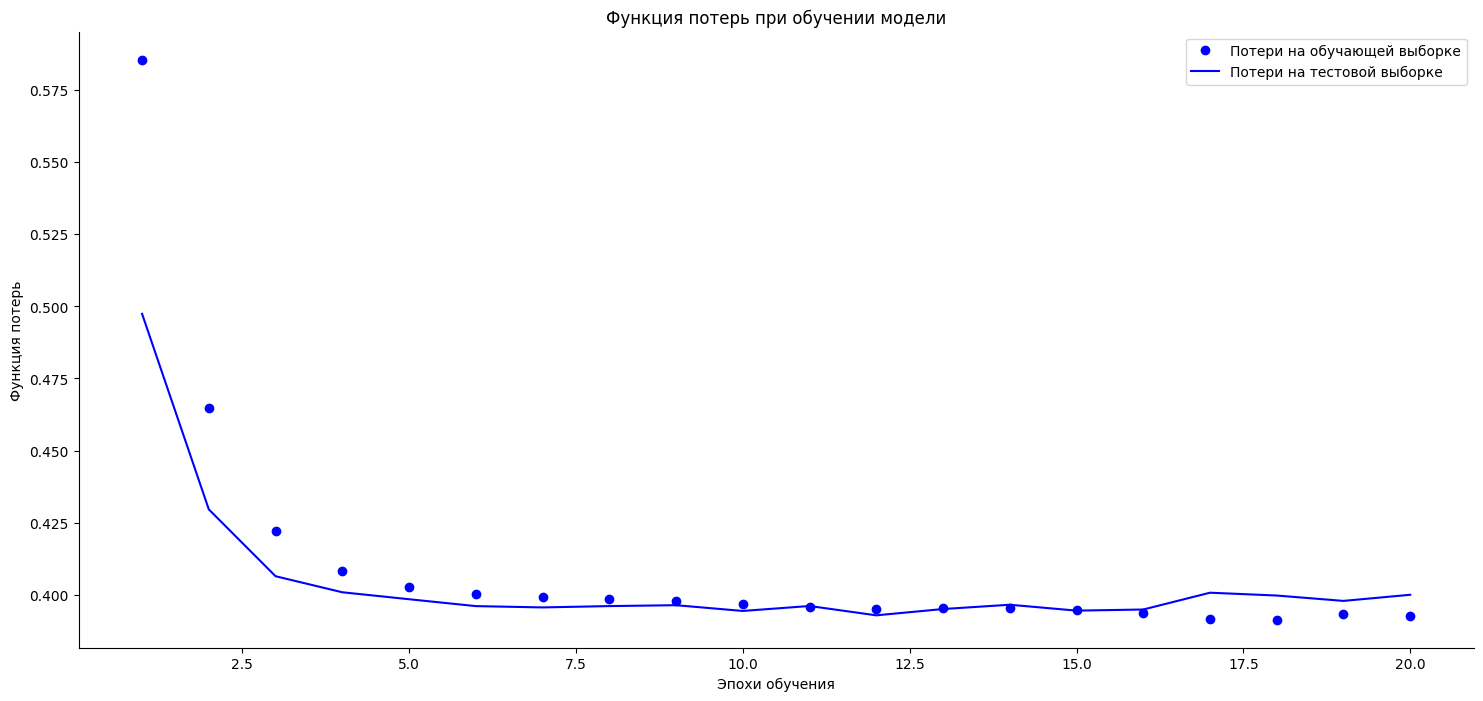

In [126]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Потери на обучающей выборке")
plt.plot(epochs, val_loss, "b", label="Потери на тестовой выборке")
plt.title("Функция потерь при обучении модели")
plt.xlabel("Эпохи обучения")
plt.ylabel("Функция потерь")
plt.legend();